### Student Information
Name: 洪偉豪

Student ID: 108062324

GitHub ID: MilkShakeBro

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# Take Home Exercise

## Exercise 2

In [18]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

##########################
# Exercise 2 (take home) #
##########################

#Swap column
# X.loc[:, ["text", "category_name"]] = X[["category_name", "text"]].to_numpy()
# X[:10][['text', 'category_name']] # check if the column has been swapped

#Attribute access
x = X.copy()
# x.text # check if it can really access the text column

#Assign a dict to the data frame
# X.iloc[0] = {'text': 'hi', 'category': 4, 'category_name': 'milkshakebro'}
# X[:10][['text', 'category']] # check if the value is assigned

#Slicing range
x = X.copy()
# x[:5]   # top 5
# x[::2]  # interval = 2
# x[::-1] # start from the end

#Getting value from the column
# X.loc[:, 'category'] == 3 # select the category which value is 3 and return a boolean array

## Exercise 5

In [ ]:
# Usage of .isnull()
# Detect missing values for an array-like object.
# This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

# Explanation
# 0 -> numeric arrays -> True  (By .isnull() usage)
# 1 -> Empty          -> True  (By .isnull() usage)
# 2 -> String         -> False (This is a string type)
# 3 -> String         -> False (This is a string type)
# 4 -> None           -> True  (By .isnull() usage)
# 5 -> String         -> False (Empty String in python is still a string type not the NaN or None type)

## Exercise 6

In [20]:
# Answer here
X.category_name.value_counts()

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

## Exercise 8

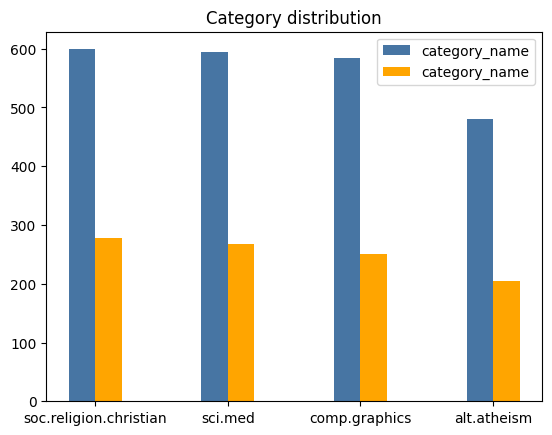

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X_sample = X.sample(n=1000) #random state

# Answer here
N = 4

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, X.category_name.value_counts(), width, color=(0.2, 0.4, 0.6, 0.9))
rects2 = ax.bar(ind + width, X_sample.category_name.value_counts(), width, color='orange')

# add some text for labels, title and axes ticks
ax.set_title('Category distribution')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'))

ax.legend((rects1[0], rects2[0]), ('category_name', 'category_name'))

plt.show()

## Exercise 10

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

# Answer here
ans = []
for key, value in enumerate(X_counts[4].toarray()[0][0:100]):
    if value == 1: print(count_vect.get_feature_names_out()[key])

00
01


## Exercise 11

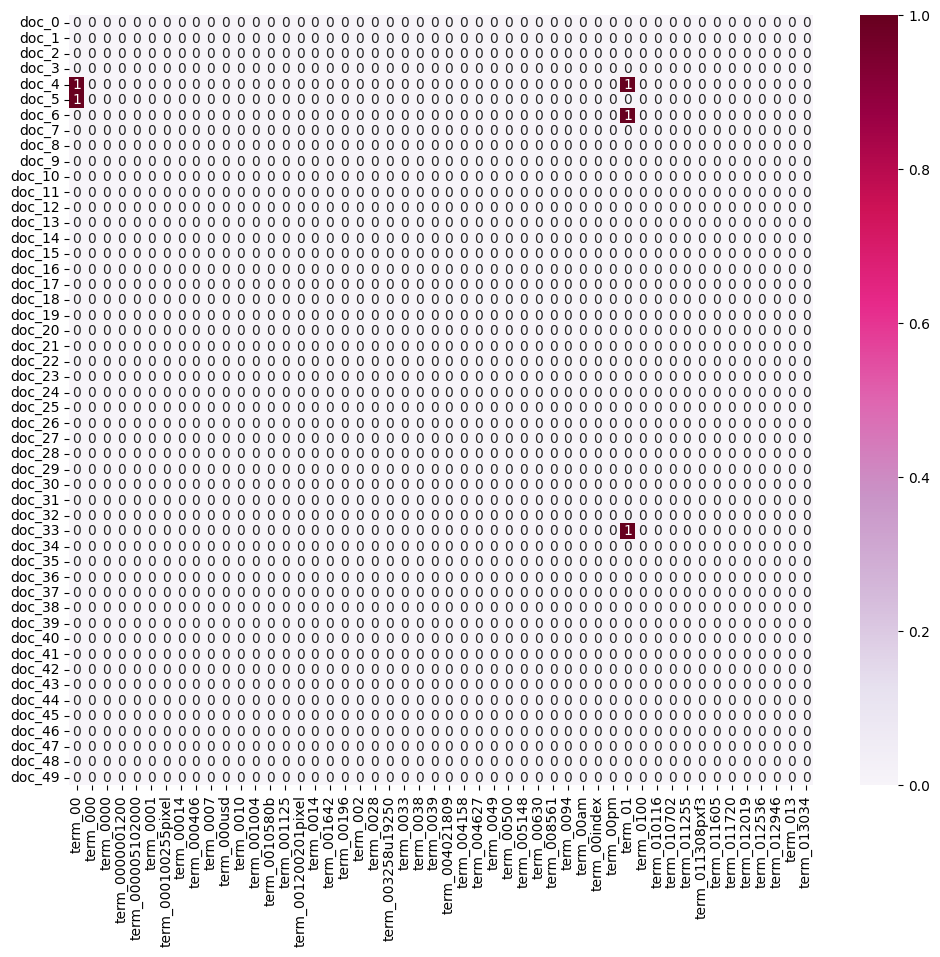

In [28]:
import seaborn as sns
# Answer here

# If you want to get certain feature names, you can modify the array range in plot_x
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]

# If you want to get certain document samples, you can modify the array range in plot_y
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]

# The range in plot_z is the combination of the plot_x and plot_y ([plot_y, plot_x])
plot_z = X_counts[0:50, 0:50].toarray()

ans = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(ans,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## Exercise 12

['red', 'blue', 'green', 'orange']
['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


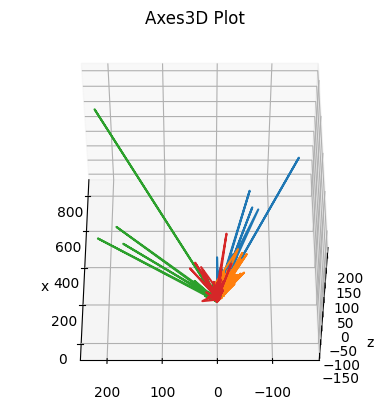

In [59]:
# Answer here

from sklearn.decomposition import PCA

col = ['red', 'blue', 'green', 'orange']
print(col)
print(categories)

ans_12 = PCA(n_components = 3).fit_transform(X_counts.toarray())

ax_ans = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = ans_12[X['category_name'] == category].T[0]
    ys = ans_12[X['category_name'] == category].T[1]
    zs = ans_12[X['category_name'] == category].T[2]
    ax_ans.plot(xs, ys, zs)

ax_ans.set_xlabel('x')
ax_ans.set_ylabel('y')
ax_ans.set_zlabel('z')
# ax_ans.view_init(elev=0, azim=0)
# ax_ans.view_init(elev=25, azim=0)
# ax_ans.view_init(elev=50, azim=0)
# ax_ans.view_init(elev=10., azim=90)
ax_ans.view_init(elev=50., azim=180)
# ax_ans.view_init(elev=10., azim=270)
plt.title('Axes3D Plot')
plt.show()

(elev=25, azim=0), (elev=50, azim=0), (elev=50, azim=180): 
-> We can see that blue and green lines have a hint of separation, while orange and blue lines have the same tendency.
This could represent that the most of the charateristic of 'soc.religion.christian' and 'com.graphics' may be different, while most of the charateristic of 'sci.med' and 'soc.religion.christian' may be close to each other.

## Exercise 13

In [62]:
# Answer here

import plotly.express as px

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
ans_13 = px.bar(x=count_vect.get_feature_names_out()[:50], y=term_frequencies[:50])
ans_13.show()

## Exercise 14

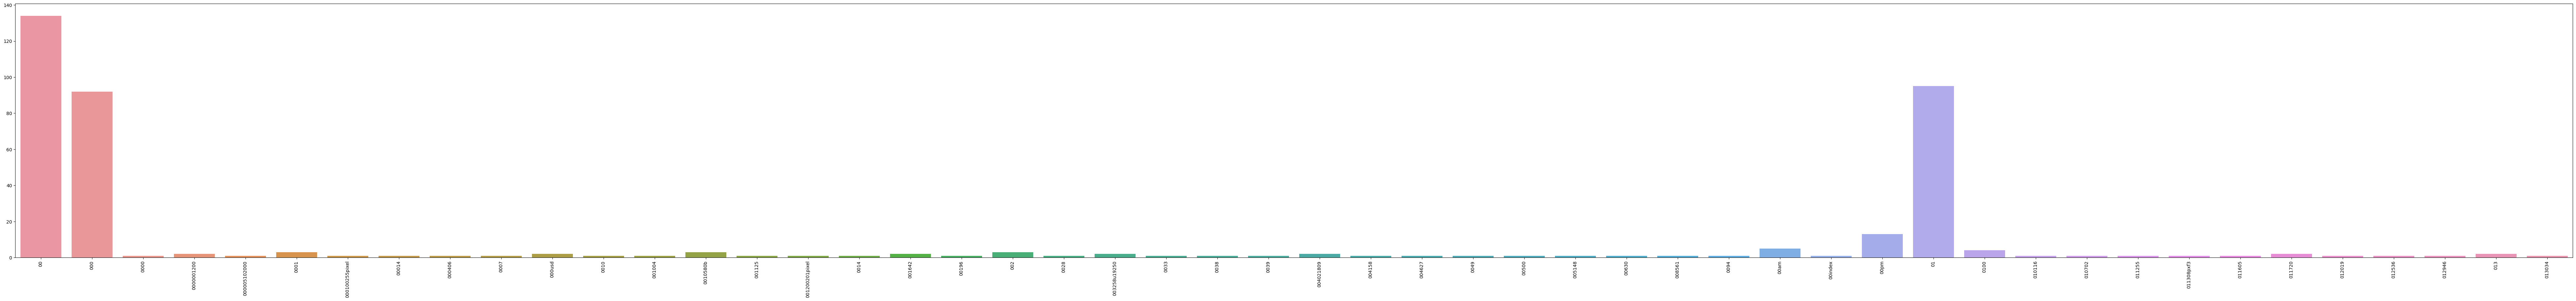

In [63]:
# Answer here
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:50], 
            y=term_frequencies[:50])
g.set_xticklabels(count_vect.get_feature_names_out()[:50], rotation = 90)
plt.show()

## Exercise 15

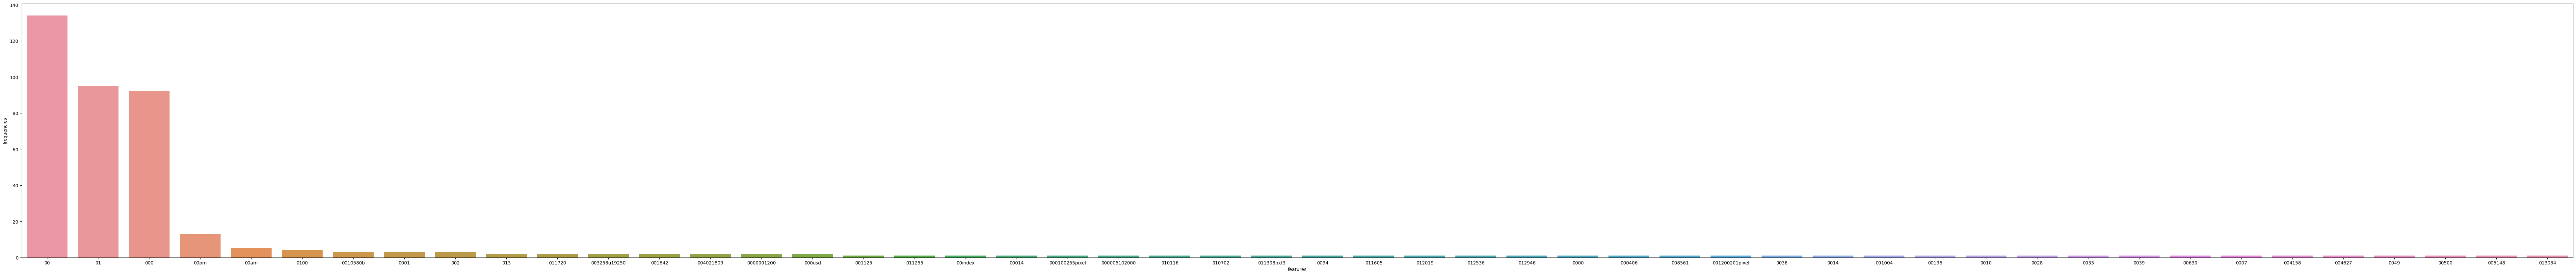

In [64]:
# Answer here
df = pd.DataFrame({"features": count_vect.get_feature_names_out()[:50], "frequencies": term_frequencies[:50]})
plt.subplots(figsize=(100, 10))
g = sns.barplot(x="features", y="frequencies", data=df, order=df.sort_values("frequencies", ascending = False).features)
plt.show()

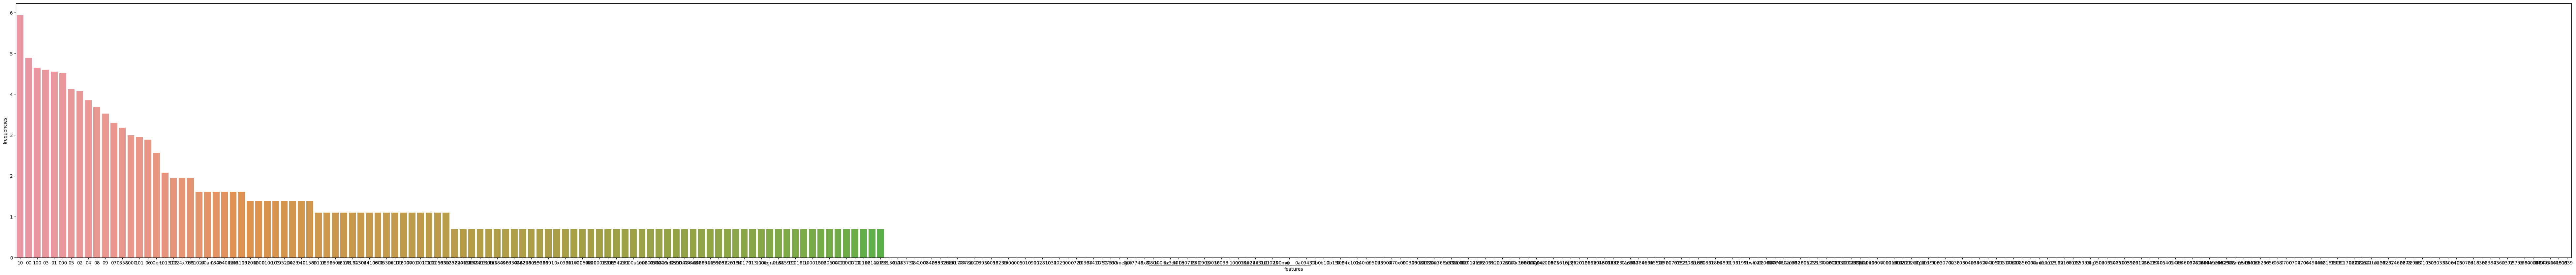

In [65]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

df = pd.DataFrame({"features": count_vect.get_feature_names_out()[:300], "frequencies": term_frequencies_log[:300]})

plt.subplots(figsize=(100, 10))
sorted = sns.barplot(x="features", y="frequencies", data=df, order=df.sort_values("frequencies", ascending = False).features)
plt.show()

## Exercise 16

In [67]:
# Answer here -- Yes, it works!

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
